Číslicová filtrace signálů


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import electrocardiogram as ECG
from scipy import signal, fft, lfiltr

ImportError: cannot import name 'lfilter' from 'scipy' (c:\Users\zposel\anaconda3\lib\site-packages\scipy\__init__.py)

C:\Users\zposel\AppData\Local\Temp\ipykernel_26668\2421512882.py:1: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  myECG = ECG();


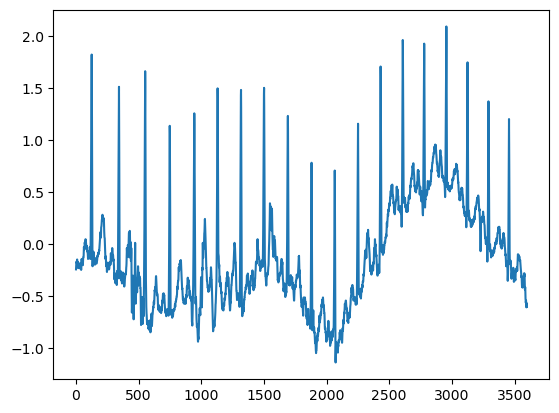

In [35]:
myECG = ECG();
Fs = 360 #Hz 
#store 10s ECG
tmax = 10 # in sec
ECGsample = myECG[0:Fs*tmax]

plt.plot(ECGsample);

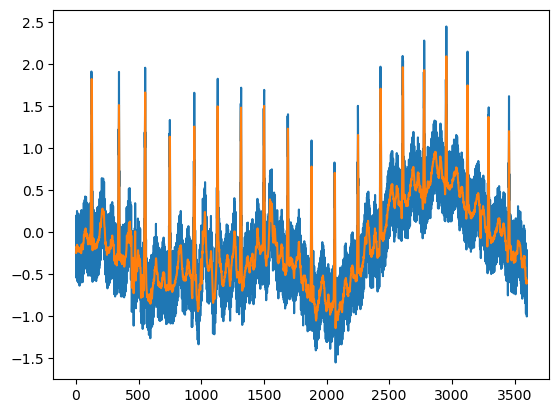

In [36]:
def SinNoise(A,tvec,f):
    vals = A*np.sin(2*np.pi*f*tvec)
    return np.array(vals)

def RandNoise(tvec, fnoise):
    vals = 2*np.random.rand(int(tvec.size))-1
    return np.array(vals)

A = np.abs(ECGsample).max()/5
f = 100 #Hz
tvec = np.linspace(0,tmax,int(Fs*tmax))
Noise = SinNoise(A,tvec,f)
#Noise = RandNoise(tvec)

ECGsignal = ECGsample  + Noise
plt.plot(ECGsignal)
plt.plot(ECGsample)
plt.show()

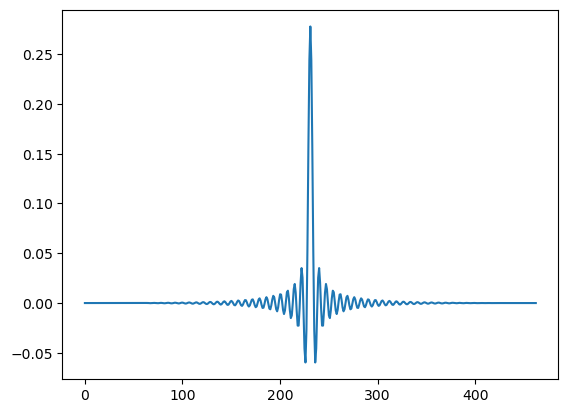

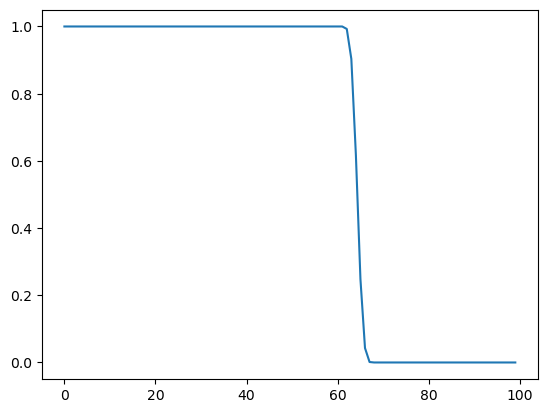

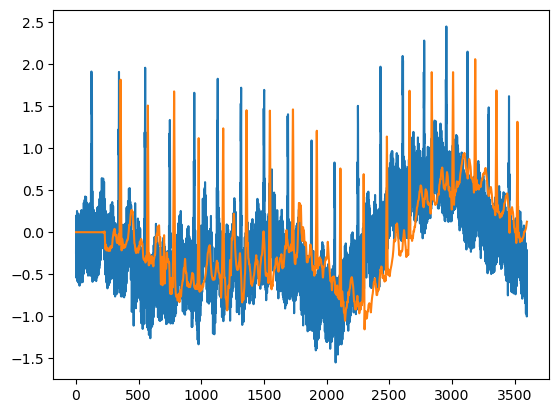

In [34]:
# navrh filtru FIR
nyq_rate = Fs/2.0
width = 5.0/nyq_rate
ripple_db = 100.0
Ntaps, beta = signal.kaiserord(ripple_db, width)

#impulzni charakteristika
ctf = 50
taps = signal.firwin(Ntaps, ctf/nyq_rate, window=('kaiser', beta))
plt.plot(taps)
plt.show()

#frekvencni charakteristika
tapsf = np.abs(fft.fft(taps))
plt.plot(tapsf[0:100])
plt.show()

#filtrace
filtered_ECG = signal.lfilter(taps, 1.0, ECGsignal)
plt.plot(ECGsignal)
plt.plot(filtered_ECG)

plt.show()
